In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
idx = ['Survey N', 'Question N']
df = pd.read_excel('../../data/processed/masterdbForNLP.xlsx').set_index(idx).sort_index().drop('Unnamed: 0', axis=1)
mac = pd.read_excel('../../data/raw/mcmaster-database-de-identified-comments.xlsx').set_index(idx).sort_index()
sas = pd.read_excel('../../data/raw/sask-database-de-identified-comments.xlsx').set_index(idx).sort_index()

In [3]:
mac = mac[['GenderRes','GenderFac','Type','Unnamed: 6','EPA','PGY']]
mac['EPA'] = mac['EPA'].str.split(':').apply(lambda x: x[0])
mac.rename({'Unnamed: 6': 'ObserverType'}, inplace=True, axis=1)

sas = sas[['Resident Name', 'Observer Name', 'Observer Type', 'EM/PEM vs off-service', 'EPA']]
sas.rename({'Resident Name': 'GenderRes', 'Observer Name': 'GenderFac', 'Observer Type': 'ObserverType', 'EM/PEM vs off-service': 'Type'}, inplace=True, axis=1)

mac_sas = pd.concat([mac, sas])

In [4]:
mac_sas['GenderFac'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)
mac_sas.loc[~np.isin(mac_sas['GenderFac'], ['Male','Female']), 'GenderFac'] = 'Unknown'
mac_sas['GenderRes'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)
mac_sas['Type'].replace({'Off Service Faculty': 'Off Service', 'Off-service': 'Off Service', 'EM Regina': 'EM', 'EM (Regina)': 'EM', 'Emergency (BC)': 'EM'}, inplace=True)
mac_sas['Type'].fillna('Unknown', inplace=True)
mac_sas['ObserverType'] = mac_sas['ObserverType'].str.lower()
mac_sas['ObserverType'].replace({'facutly': 'faculty'}, inplace=True)
mac_sas['PGY'].fillna('Unknown', inplace=True)

In [5]:
df = df.join(mac_sas).reset_index()

In [6]:
df

,Survey N,Question N,commentId,dataSource,NumberFromRawData,comment,rating,q1p1,q1p2,q2p1,...,Q1,Q2,Q3,QUAL,GenderRes,GenderFac,Type,ObserverType,EPA,PGY
0,1,1,0,Sas,1,The trainee had the opportunity to reduce a fo...,4.0,1,3,2,...,2,1,1,4,Male,Male,Unknown,clinical supervisor,C13,Unknown
1,1,2,1,Sas,2,This was a flow shift that exhibited the train...,5.0,2,3,2,...,3,0,0,3,Male,Male,Unknown,clinical supervisor,TP1,Unknown
2,1,3,2,Sas,3,Able to synthesize significant patient past hi...,5.0,3,2,2,...,2,0,0,2,Male,Male,Unknown,clinical supervisor,F2,Unknown
3,1,4,3,Sas,4,"As discussed, your signposting helped your pat...",3.0,2,2,1,...,2,0,0,2,Male,Female,EM,clinical supervisor,C7,Unknown
4,1,5,4,Sas,5,The trainee communicated a consultation to Int...,4.0,1,2,1,...,3,1,1,5,Male,Male,Unknown,clinical supervisor,TD3,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,25,96,1245,Mac,1246,Completely independently diagnosed and managed...,5.0,1,1,2,...,3,0,0,3,Male,Male,PEM,faculty,C5,2.0
2496,25,97,1246,Mac,1247,Excellent block and procedure\nReduction anato...,5.0,2,2,2,...,2,0,0,2,Female,Male,EM,faculty,C13,2.0
2497,25,98,1247,Mac,1248,NaN,5.0,4,4,2,...,0,0,0,0,Female,Male,PEM,faculty,TP4,4.0
2498,25,99,1248,Mac,1249,Excellent MSK assessment of a patient with kne...,5.0,1,1,2,...,3,0,0,3,Female,Female,EM,faculty,F2,1.0


In [89]:
df.join(mac_sas).shape

(2500, 39)

In [44]:
sas
# sas.columns
)
sas

GenderRes    GenderFac         ObserverType         Type  \
Survey N Question N                                                            
1        1               Male         Male  Clinical Supervisor          NaN   
         2               Male         Male  Clinical Supervisor          NaN   
         3               Male         Male  Clinical Supervisor          NaN   
         4               Male       Female  Clinical Supervisor           EM   
         5               Male         Male  Clinical Supervisor          NaN   
...                       ...          ...                  ...          ...   
25       46              Male         Male  Clinical Supervisor  Off-service   
         47              Male       Female  Clinical Supervisor          NaN   
         48              Male  Dr Lougheed  Clinical Supervisor  Anaesthesia   
         49            Female         Male             Resident          NaN   
         50            Female         Male  Clinical Supervisor          NaN   

                     EPA  
Survey N Question N       
1        1           C13  
         2           TP1  
         3            F2  
         4            C7  
         5           TD3  
...                  ...  
25       46           C3  
         47          C15  
         48           C3  
         49          C14  
         50          C14  

[1250 rows x 5 columns]

In [47]:
pd.concat([mac, sas]).GenderFac.replace({'M': 'Male', 'F': 'Female'}).value_counts()

Male                 1447
Female                877
?                       8
the trainee oulie       5
Dr A Card               4
                     ... 
Dr Gowda                1
Dr Zacharias            1
Dr Perverseff           1
Dr S Wilms              1
Dr Lougheed             1
Name: GenderFac, Length: 132, dtype: int64

In [29]:
df.join(mac_sas).columns

Index(['Unnamed: 0', 'commentId', 'dataSource', 'NumberFromRawData', 'comment',
       'rating', 'q1p1', 'q1p2', 'q2p1', 'q2p2', 'q3p1', 'q3p2', 'q1p1T',
       'q1p2T', 'q2p1T', 'q2p2T', 'q3p1T', 'q3p2T', 'P1QualScore',
       'P2QualScore', 'Q1Match', 'Q2Match', 'Q3Match', 'perfectMatch',
       'RobMacCommentModified', 'RobMacQ1', 'RobMacQ2', 'RobMacQ3',
       'RobMacQualScore', 'Q1', 'Q2', 'Q3', 'QUAL', 'Number', 'Assessment_ID',
       'RAND', 'GenderRes', 'GenderFac', 'Type', 'Unnamed: 6', 'Level', 'EPA',
       'Based on my observation of the resident's performance on this EPA today:',
       'Please provide comments about how the resident performed on THIS specific EPA.',
       'Professionalism Safety', 'Unnamed: 12', 'Unnamed: 13', 'Block', 'PGY',
       'Cycle', 'Type.1', 'Date',
       'Overall, how did the resident perform during this shift?',
       'Random Number', 'Resident Name', 'Observer Name', 'Observer Type',
       'EM/PEM vs off-service', 'Situation Context', 'R

In [18]:
df.columns

Index(['Unnamed: 0', 'commentId', 'dataSource', 'NumberFromRawData', 'comment',
       'rating', 'Survey N', 'Question N', 'q1p1', 'q1p2', 'q2p1', 'q2p2',
       'q3p1', 'q3p2', 'q1p1T', 'q1p2T', 'q2p1T', 'q2p2T', 'q3p1T', 'q3p2T',
       'P1QualScore', 'P2QualScore', 'Q1Match', 'Q2Match', 'Q3Match',
       'perfectMatch', 'RobMacCommentModified', 'RobMacQ1', 'RobMacQ2',
       'RobMacQ3', 'RobMacQualScore', 'Q1', 'Q2', 'Q3', 'QUAL'],
      dtype='object')

KeyError: 'EPA'

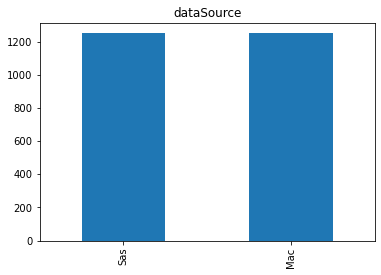

<Figure size 432x288 with 0 Axes>

In [17]:
categorical_cols = ['dataSource','EPA','GenderRes','GenderFac', 'ObserverType', 'ObserverSpecialty',
    'PGY', 'rating', 'Q1Match', 'Q2Match', 'Q3Match', 'perfectMatch', 'Q1', 'Q2', 'Q3', 'QUAL']
for col in categorical_cols:
    plt.figure()
    df[col].fillna('NA').value_counts().plot.bar()
    plt.title(col)